In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import src.dynadojo as dd
import numpy as np
from src.dynadojo.systems.lds import LDSystem

(<Figure size 640x480 with 1 Axes>, <Axes: >)

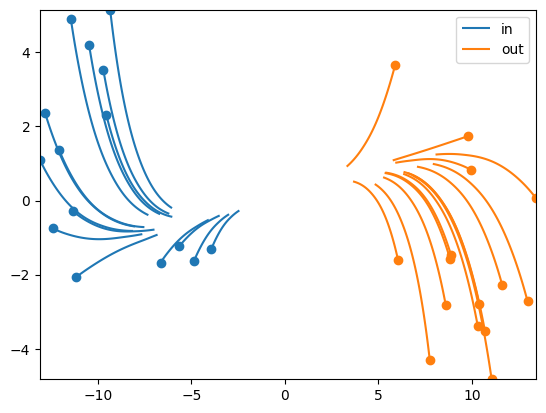

In [4]:
latent_dim = 2
embed_dim = 3
n = 5000
timesteps = 10000
system = LDSystem(latent_dim, embed_dim, noise_scale=0)
x0 = system.make_init_conds(n)
y0 = system.make_init_conds(30, in_dist=False)
x = system.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = system.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps, noisy=True)
dd.utils.lds.plot([x, y], target_dim=min(latent_dim, 3), labels=["in", "out"], max_lines=15)

In [15]:
linear_model = dd.baselines.DNN(embed_dim, timesteps, activation=None, max_control_cost=0)
linear_model.fit(x, epochs=20, verbose='auto')
x_pred = linear_model.predict(x[:, 0], timesteps)
y_pred = linear_model.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")

AttributeError: module 'dynadojo.baselines' has no attribute 'DNN'

Epoch 1/20
157/157 [==============================] - 0s 867us/step - loss: 18.2938
Epoch 2/20
157/157 [==============================] - 0s 912us/step - loss: 6.0040
Epoch 3/20
157/157 [==============================] - 0s 923us/step - loss: 2.8767
Epoch 4/20
157/157 [==============================] - 0s 910us/step - loss: 2.0116
Epoch 5/20
157/157 [==============================] - 0s 908us/step - loss: 1.6034
Epoch 6/20
157/157 [==============================] - 0s 927us/step - loss: 1.3559
Epoch 7/20
157/157 [==============================] - 0s 914us/step - loss: 1.1835
Epoch 8/20
157/157 [==============================] - 0s 904us/step - loss: 1.0523
Epoch 9/20
157/157 [==============================] - 0s 905us/step - loss: 0.9498
Epoch 10/20
157/157 [==============================] - 0s 917us/step - loss: 0.8645
Epoch 11/20
157/157 [==============================] - 0s 917us/step - loss: 0.7956
Epoch 12/20
157/157 [==============================] - 0s 923us/step - loss: 0.7362


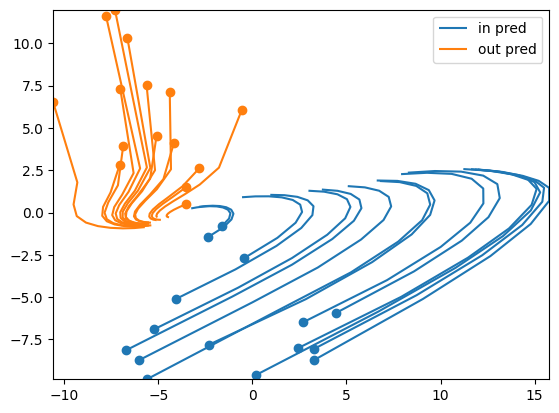

In [6]:
nonlinear_model = dd.baselines.DNN(embed_dim, timesteps, activation="tanh", max_control_cost=0)
nonlinear_model.fit(x, epochs=20, verbose='auto')
x_pred = nonlinear_model.predict(x[:, 0], timesteps)
y_pred = nonlinear_model.predict(y[:, 0], timesteps)
dd.utils.lds.plot([x_pred, y_pred], target_dim=min(3, latent_dim), labels=["in pred", "out pred"], max_lines=15)
x_err = system.calc_error(x, x_pred)
y_err = system.calc_error(y, y_pred)
print(f"{x_err=}")
print(f"{y_err=}")